<center>

# Estimating the Value Of $\pi$ Using Monte Carlo Simulation

</center>

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Simulation Concept

- Area Of Square = $r^2$
- Area Of Circle = $\pi r^2$

$$
\therefore  {The Value Of \pi} = \frac {Area Of circle}{Area Of Square}
$$

In [2]:
bounds = [0, 1]
trials = 10000
radius = bounds[1]/2
center = [0.5, 0.5]
iterations=100

def MTsimulate(bounds, n_samples):
        x, y = np.random.uniform(bounds[0], bounds[1], n_samples), np.random.uniform(bounds[0], bounds[1], n_samples)
        return x, y

def run_simulation(iterations=100):
    pi_values = []
    x_values, y_values = [], []
    for n_samples in range(1000, 1000*iterations+1, 1000):
        x, y = MTsimulate(bounds, n_samples)
        dist = (x - center[0])**2 + (y - center[1])**2
        incircle_points = np.sum(dist <= radius**2)
        pi_estimate = 4 * incircle_points / n_samples
        pi_values.append(pi_estimate)
        x_values.append(x)
        y_values.append(y)
        
    return pi_values, x_values, y_values

pi_values, x_values, y_values = run_simulation()

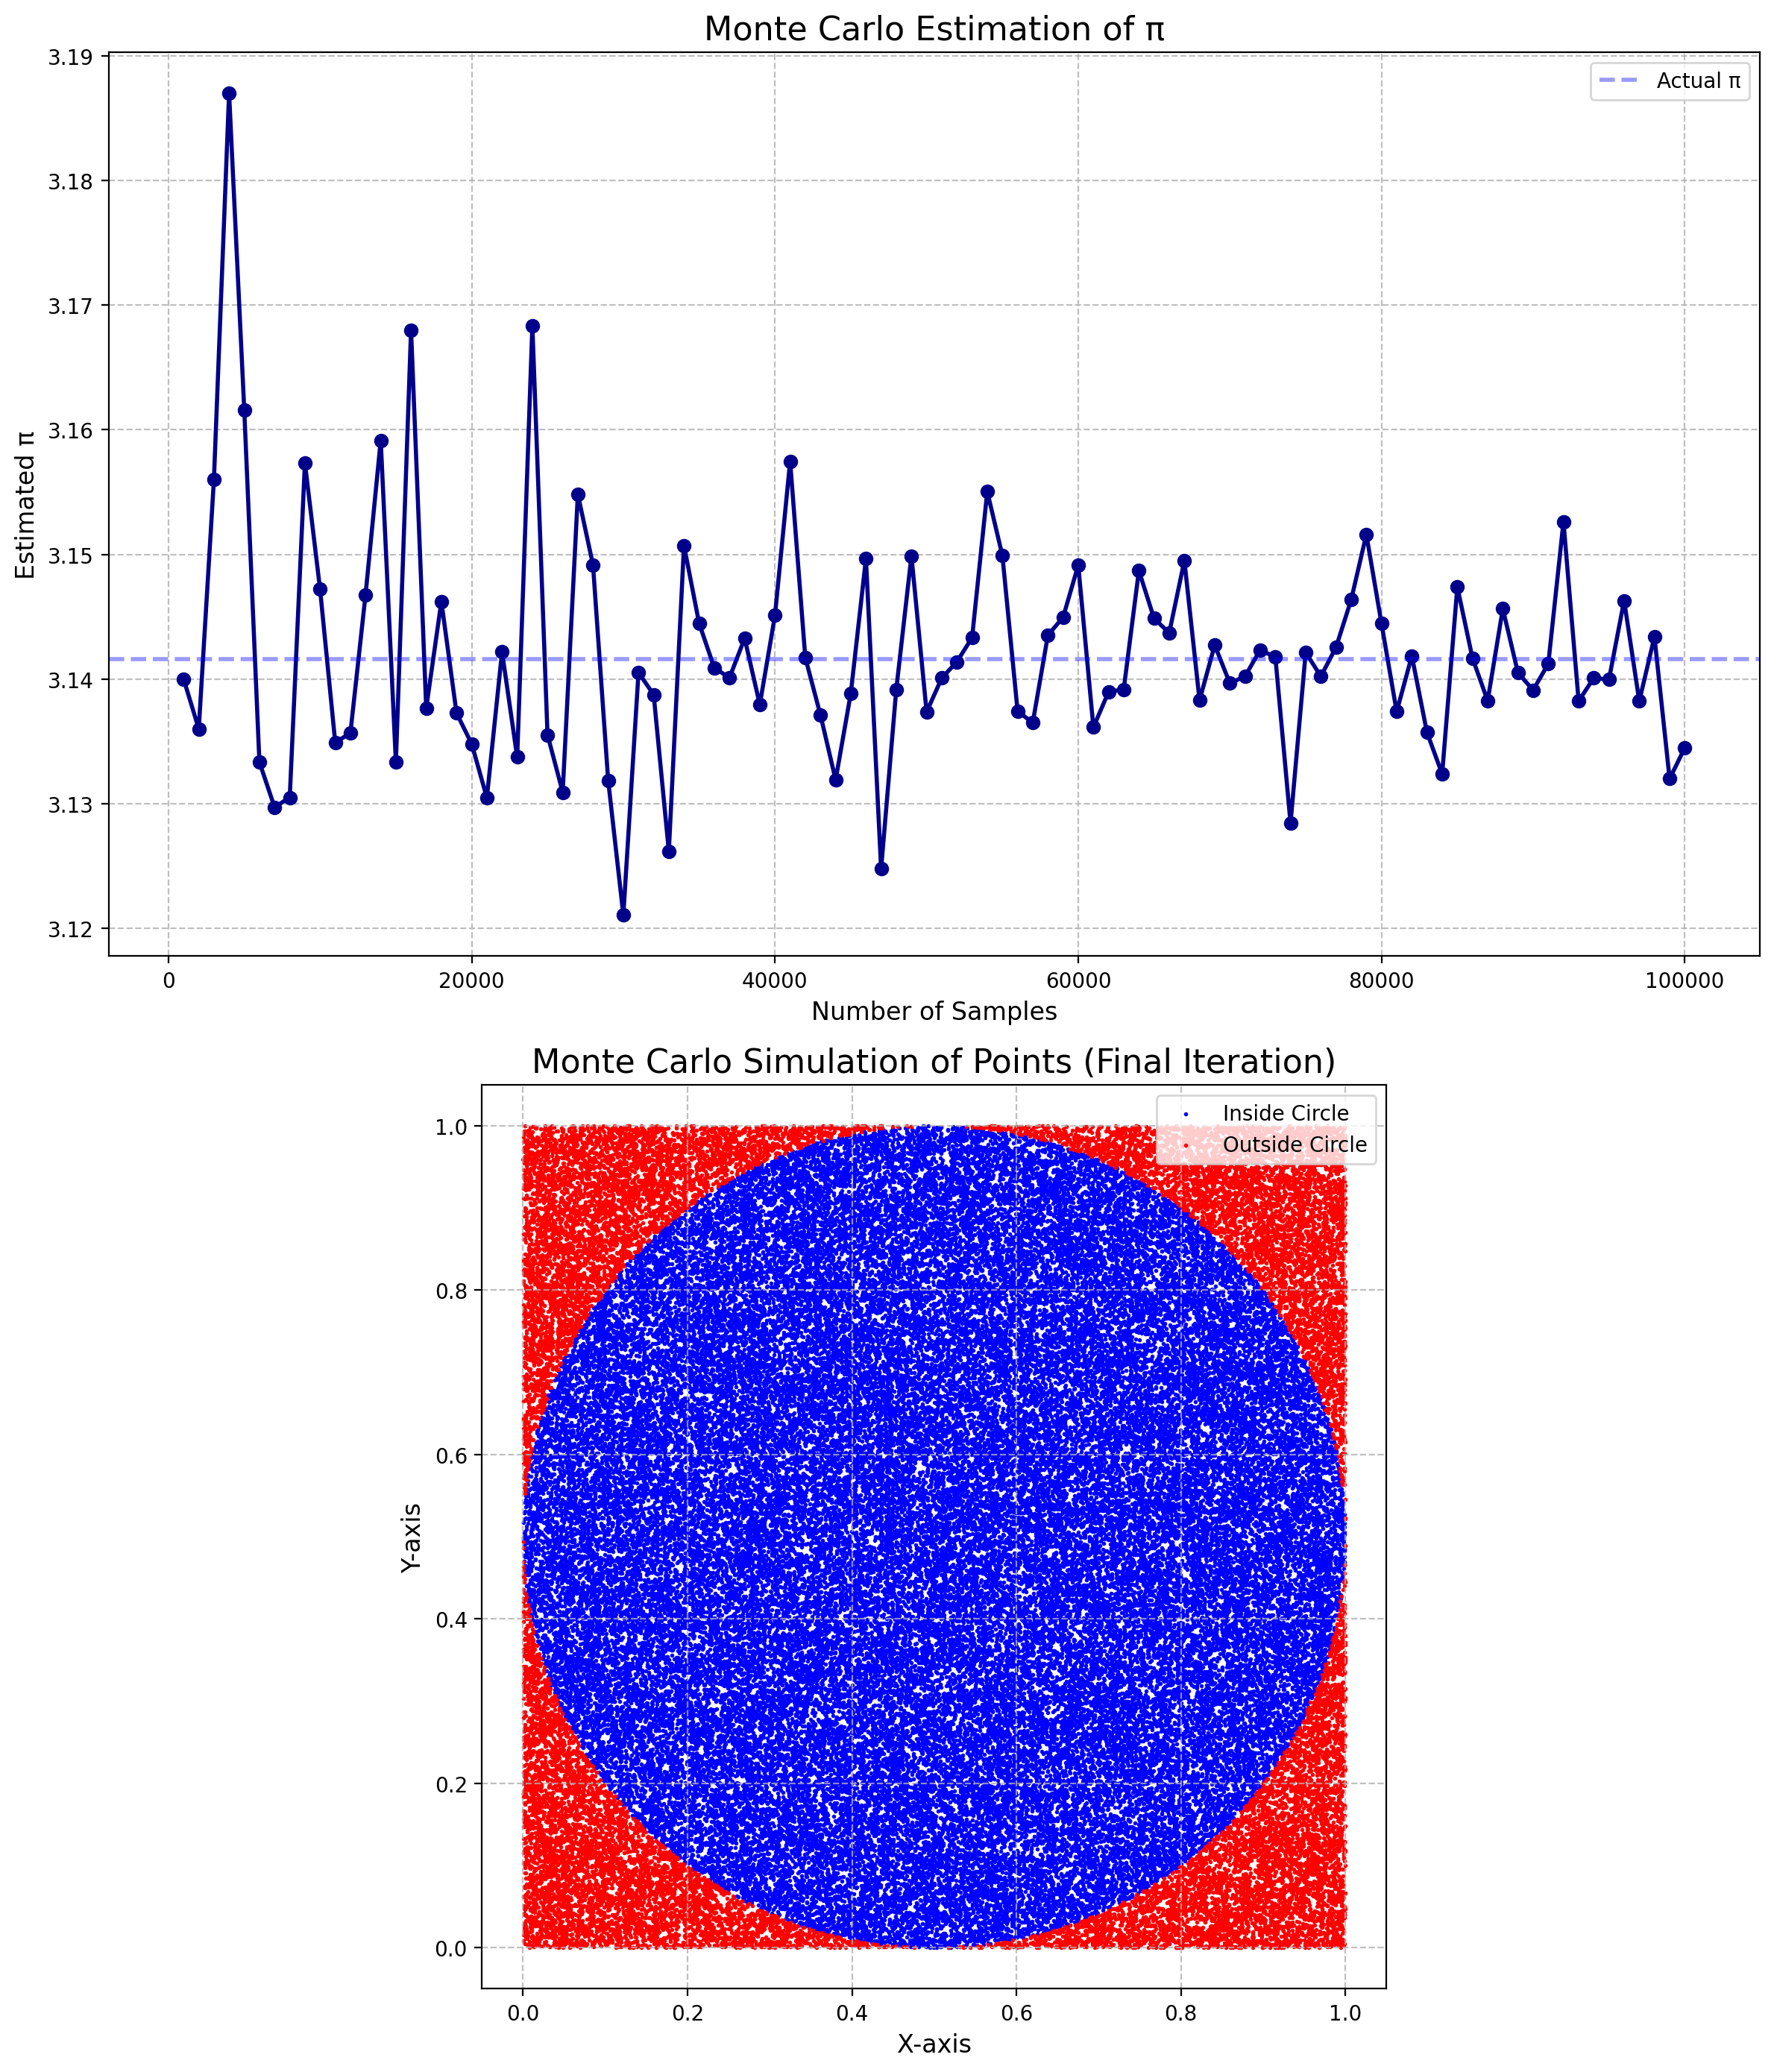

In [3]:
x, y = x_values[-1], y_values[-1]
dist = (x - center[0])**2 + (y - center[1])**2
is_inside = dist <= radius**2

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14), dpi=200)

samples_range = range(1000, 1000 * iterations + 1, 1000)
ax1.plot(samples_range, pi_values, marker='o', color='darkblue', linewidth=2)
ax1.axhline(np.pi, color='blue', linestyle='--', linewidth=2, label='Actual π', alpha=0.4)
ax1.set_title("Monte Carlo Estimation of π", fontsize=16)
ax1.set_xlabel("Number of Samples", fontsize=12)
ax1.set_ylabel("Estimated π", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.8)
ax1.legend()

ax2.scatter(x[is_inside], y[is_inside], c='blue', s=1, label='Inside Circle')
ax2.scatter(x[~is_inside], y[~is_inside], c='red', s=1, label='Outside Circle')
ax2.set_aspect('equal', adjustable='box')
ax2.set_title('Monte Carlo Simulation of Points (Final Iteration)', fontsize=16)
ax2.set_xlabel('X-axis', fontsize=12)
ax2.set_ylabel('Y-axis', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.8)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()